# Import the required libraries

In [3]:
import pandas as pd   #displaying data
import numpy as np   #numerical operation
# from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder  #split the dataset
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns #visualisation framework
import nltk  #natural language tool kit
import string  #string related operation
from nltk.corpus import stopwords  #identifying the stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [4]:
df = pd.read_csv("sms-spam.csv")
#df-->data frames
#read_csv--->for reading the csv file


In [5]:
df.head()
#it will give the first 5 rows of the file
#it can be used to verify that our data has been successfully imported or not

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.tail()
#it will give last 5 rows of the file

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df.sample(5)
#it will give the random 5 rows of the file

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2581,ham,Yup i'm elaborating on the safety aspects and ...,NaN,NaN,NaN
1821,ham,I couldn't say no as he is a dying man and I f...,NaN,NaN,NaN
2397,ham,Neshanth..tel me who r u?,NaN,NaN,NaN
3820,ham,You are right though. I can't give you the spa...,NaN,NaN,NaN
3842,ham,Yes ammae....life takes lot of turns you can o...,NaN,NaN,NaN


In [8]:
df.columns
# we can see all the columns in the file
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) #...to delete the columns
# if we dont use inplace it will update the changes to new data frames (df)

In [9]:
# renaming the columns
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
#                OR
# df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
encoder = LabelEncoder()   #ENCODING SPAM =1 HAM = 0
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.label
# display all the label present in the file

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [12]:
df.message
# display all the messages in the file

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [13]:
df['label'].value_counts()
# give the total count of label---->ham=4825,spam=747


label
0    4825
1     747
Name: count, dtype: int64

In [14]:
df.isnull()
# returns true if null....else false

,label,message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [15]:
df.isnull().sum()
# gets the count of null values

label      0
message    0
dtype: int64

In [16]:
# to check the dulicates
df.duplicated().sum()

np.int64(403)

In [17]:
df.drop_duplicates(inplace=True)
# it will delete all the duplicate values

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape  #output (rows,columns)

(5169, 2)

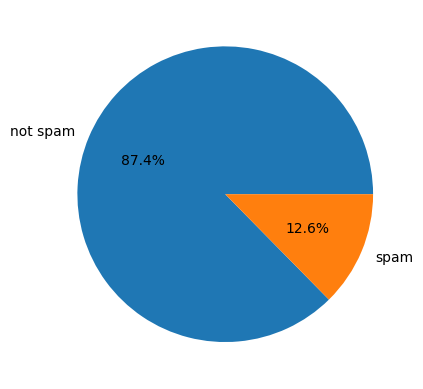

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['not spam', 'spam'], autopct='%1.1f%%') #auto percentage
plt.show()

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk

In [23]:
nltk.download('all') #download all the collections

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package 

[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping models/bllip_wsj_no_aux.zip.
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping grammars/book_grammars.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data

True

In [24]:
nltk.download('punkt')   #punkt means punctuation kit

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
#creating a new column with the count of characteers
df['char_count'] = df['message'].apply(len)
#creating a new column with the count of words
df['word_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
#creating a new column with the count of sentences
df['sentence_count'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df[['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['label']==0][['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['label']==1][['char_count','word_count','sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char_count', ylabel='Count'>

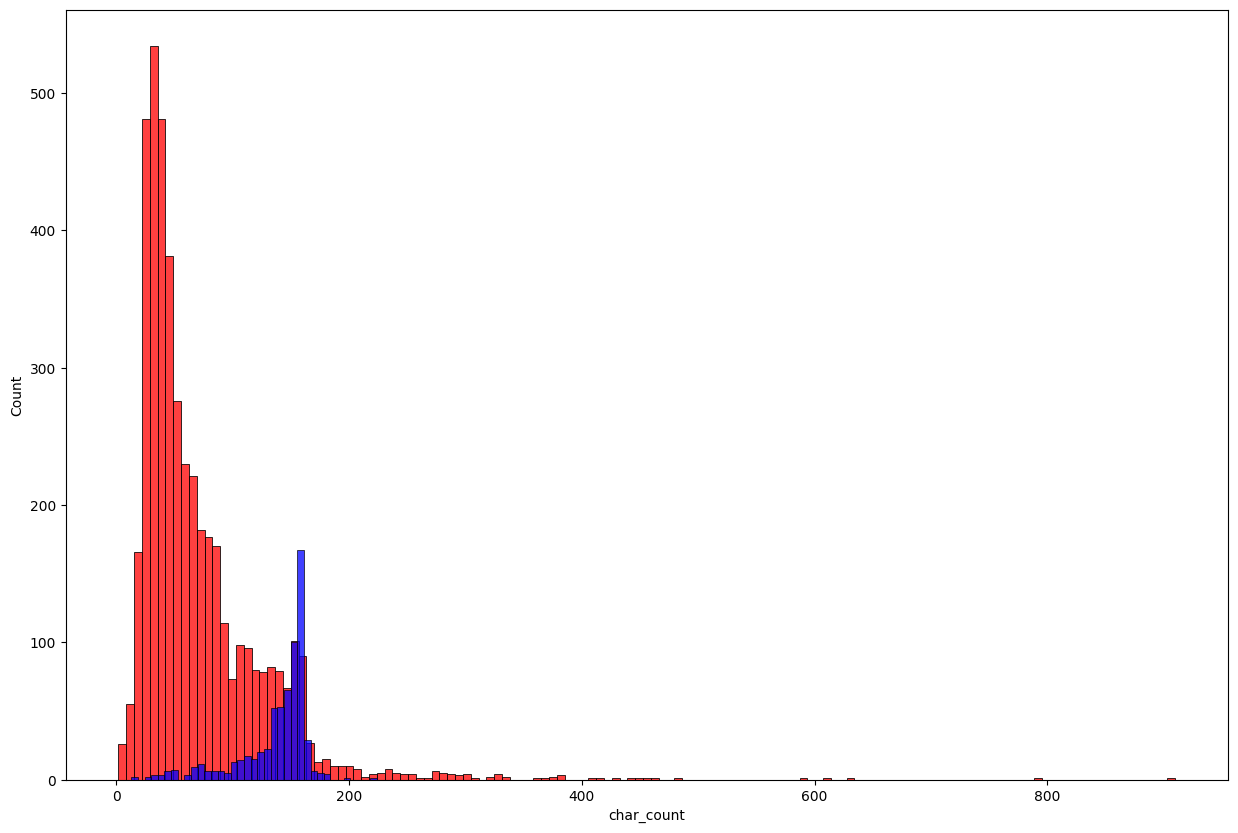

In [30]:
#for better visualisation we will plot histogram using seaborn
plt.figure(figsize=(15,10))
sns.histplot(df[df['label']==0]['char_count'],color="RED")
sns.histplot(df[df['label']==1]['char_count'],color="BLUE")

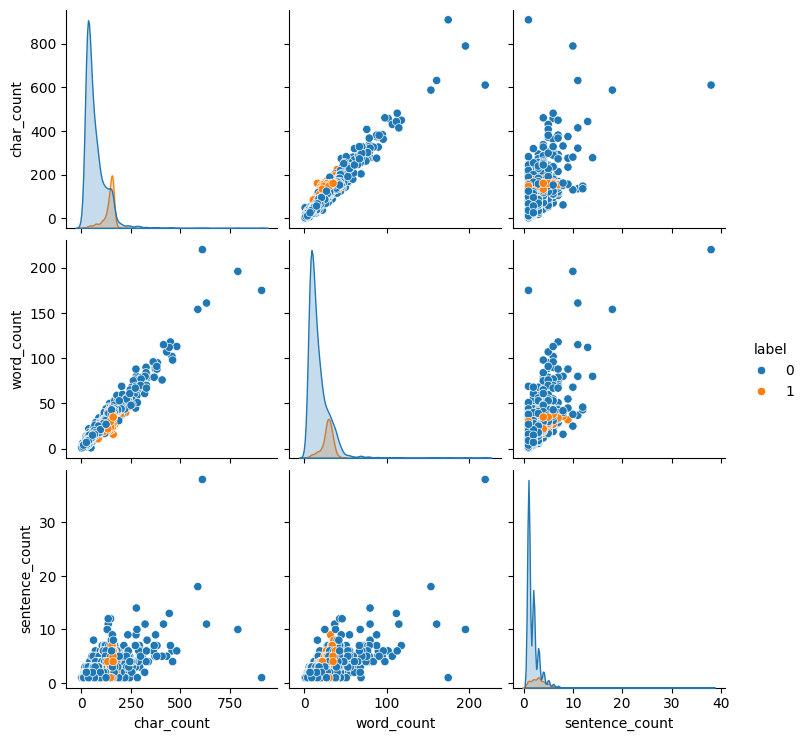

In [31]:
sns.pairplot(df,hue='label')

In [32]:
#spam -->1   ham-->0
#df= df.replace({'spam': 1, 'ham': 0}, inplace=True)

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
def transform_text(text):
  #converting string to lower case
  text = text.lower() #Text == teXt

  #tokenization
  text = nltk.word_tokenize(text) #to identify the stopword

  #removing special characters
  removedSC= list()
  for i in text:
    if i.isalnum():
      removedSC.append(i)

  #updatng the text after removing special characters
  text = removedSC[:]

  #removing stopwords and punctuation characters
  removedSWPC = list()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      removedSWPC.append(i)

  #updating the text after removing the stop words and punctuation
  text = removedSWPC[:]

  #stemming
  ps = PorterStemmer()
  stemmed_words = list()
  for i in text:
    stemmed_words.append(ps.stem(i))
  text = stemmed_words[:]
  return " ".join(text)

In [35]:
df['processed_text'] = df['message'].apply(transform_text)
#will create a new column to store the transformed text
df.head()

,label,message,char_count,word_count,sentence_count,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
!pip install WordCloud
from wordcloud import WordCloud 

In [40]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
#creating word cloud for data visualisation

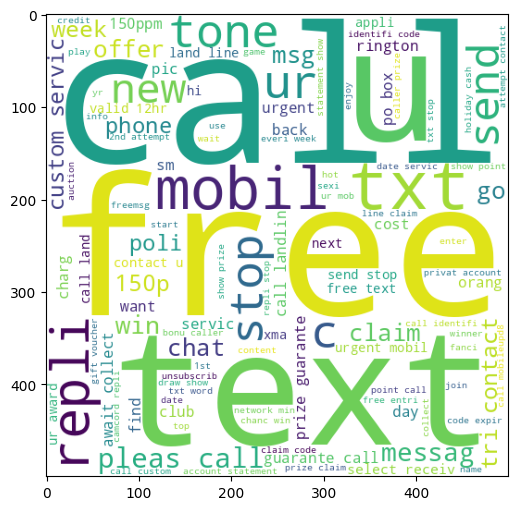

In [41]:
#for spam
spamWc = wc.generate(df[df['label']==1]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spamWc)

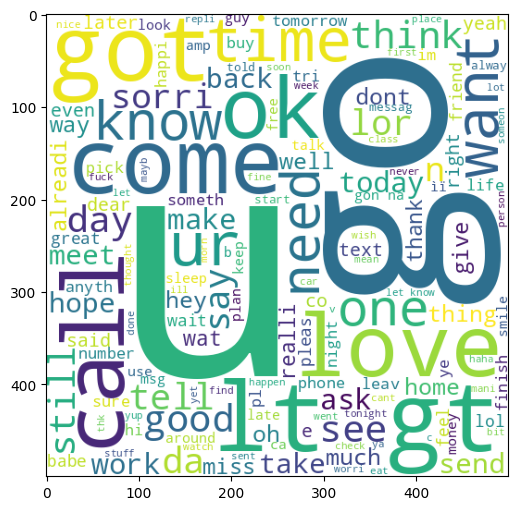

In [42]:
spamWc = wc.generate(df[df['label']==0]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spamWc)

In [43]:
#extracting the spam messages
spamWords = list()
for message in df[df['label']==1]['processed_text'].tolist():
  for word in message.split():
    spamWords.append(word)

In [44]:
spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [45]:
spamWordsDictionary = Counter(spamWords)
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [46]:
most_common_spam_words = pd.DataFrame(spamWordsDictionary.most_common(40), columns=['Word', 'Frequency'])

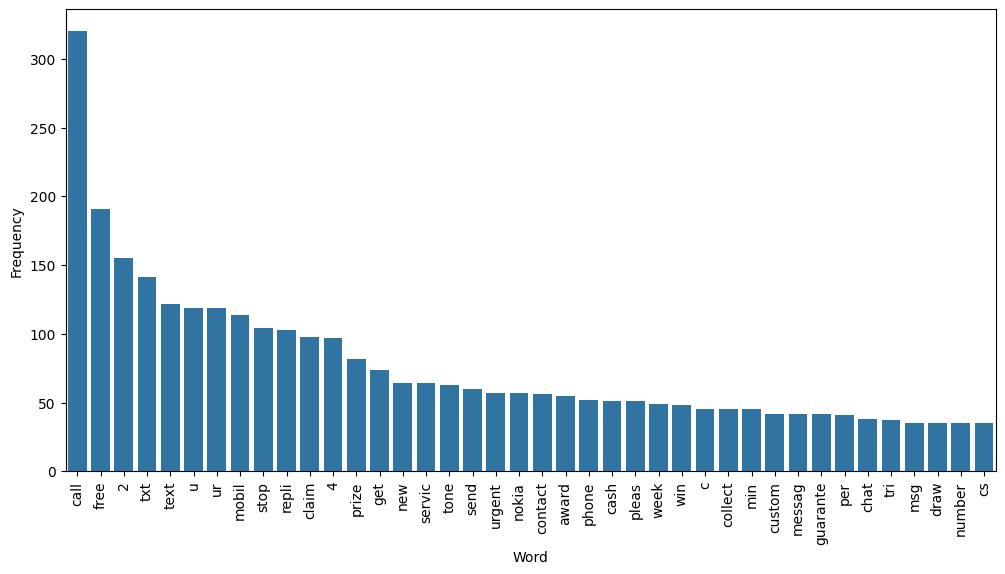

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=most_common_spam_words)
plt.xticks(rotation=90)
plt.show()

# Modelling

In [48]:
cv = CountVectorizer()

In [49]:
X = cv.fit_transform(df['processed_text']).toarray()
X.shape

(5169, 6708)

In [50]:
Y = df['label'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=49)

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [54]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]


In [55]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]


In [56]:
tf = TfidfVectorizer()
X = tf.fit_transform(df['processed_text']).toarray()
Y = df['label'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=49)

In [57]:
import pickle
pickle.dump(tf,open('transform.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))